# Animal segmentation

The CIFAR-10 dataset which consists of 10 different image types.

In [1]:
import pandas as pd
import numpy as np

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [6]:
import matplotlib.pyplot as plt

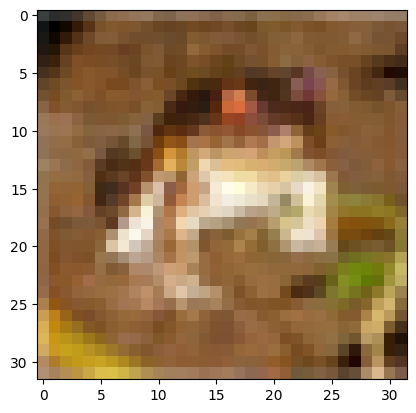

In [7]:
# FROG
plt.imshow(x_train[0])
#ba Ipython.display neshan dade shavad

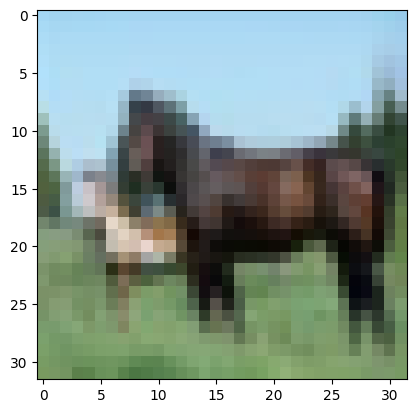

In [8]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [9]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [10]:
x_train[0].shape

(32, 32, 3)

In [11]:
x_train = x_train/225

In [12]:
x_test = x_test/255

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_train[0]

array([6], dtype=uint8)

In [18]:
y_cat_train = to_categorical(y_train,10)

In [19]:
y_cat_train.shape

(50000, 10)

In [20]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [21]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [27]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 77s 49ms/step - loss: 1.5114 - accuracy: 0.4584 - val_loss: 1.3101 - val_accuracy: 0.5266
Epoch 2/15
1563/1563 [==============================] - 75s 48ms/step - loss: 1.1542 - accuracy: 0.5959 - val_loss: 1.0908 - val_accuracy: 0.6186
Epoch 3/15
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0025 - accuracy: 0.6535 - val_loss: 1.0508 - val_accuracy: 0.6292
Epoch 4/15
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8948 - accuracy: 0.6904 - val_loss: 1.0999 - val_accuracy: 0.6238
Epoch 5/15
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8132 - accuracy: 0.7212 - val_loss: 0.9424 - val_accuracy: 0.6824
Epoch 6/15
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7460 - accuracy: 0.7438 - val_loss: 0.9479 - val_accuracy: 0.6860
Epoch 7/15
1563/1563 [==============================] - 77s 49ms/step - loss: 0.6835 - accuracy: 0.7667 - val_loss: 0.9990 -

In [ ]:
# model.save('cifar_10epochs.h5')

In [28]:
losses = pd.DataFrame(model.history.history)

In [29]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.511440,0.45844,1.310056,0.5266
1,1.154220,0.59592,1.090774,0.6186
2,1.002539,0.65346,1.050827,0.6292
3,0.894779,0.69042,1.099927,0.6238
4,0.813158,0.72124,0.942446,0.6824


<Axes: >

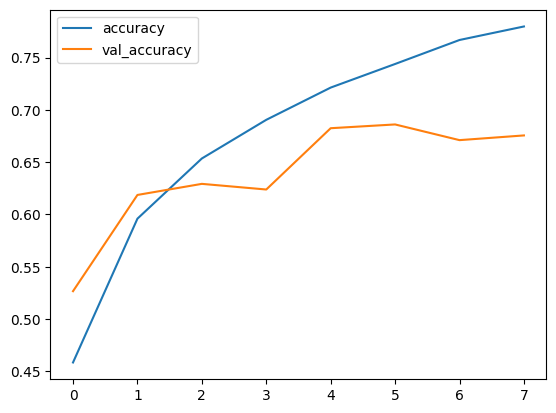

In [30]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

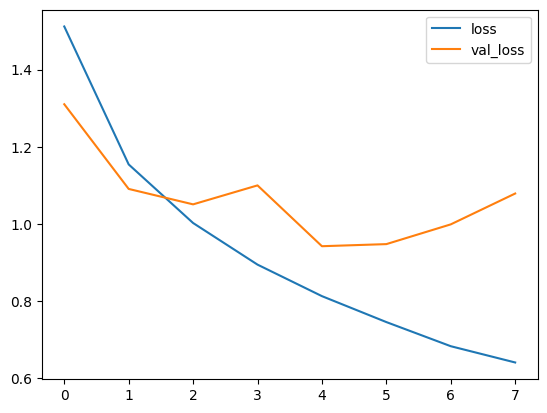

In [31]:
losses[['loss','val_loss']].plot()

In [32]:
model.metrics_names

['loss', 'accuracy']

In [33]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.0788828134536743, 0.6754999756813049]


In [36]:
from sklearn.metrics import classification_report,confusion_matrix

pred = model.predict(x_test)
predictions = pred.argmax(axis = -1)

313/313 [==============================] - 6s 18ms/step


In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1000
           1       0.77      0.83      0.80      1000
           2       0.48      0.66      0.56      1000
           3       0.49      0.53      0.51      1000
           4       0.75      0.50      0.60      1000
           5       0.54      0.59      0.56      1000
           6       0.78      0.76      0.77      1000
           7       0.82      0.65      0.73      1000
           8       0.82      0.75      0.78      1000
           9       0.75      0.78      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [38]:
confusion_matrix(y_test,predictions)

array([[699,  35,  82,  20,  12,  16,   5,   6,  76,  49],
       [ 14, 828,   7,  11,   0,  10,  10,   5,  22,  93],
       [ 66,  10, 662,  59,  31,  79,  49,  21,   9,  14],
       [ 21,  19, 109, 525,  35, 184,  58,  19,  13,  17],
       [ 28,   3, 190,  88, 499,  77,  55,  47,  11,   2],
       [ 11,   8, 131, 171,  19, 595,  16,  34,   5,  10],
       [  7,  10,  75,  84,  16,  36, 758,   2,   4,   8],
       [ 20,   9,  84,  71,  44,  84,  10, 654,   1,  23],
       [ 79,  59,  29,  20,   3,  11,   5,   1, 754,  39],
       [ 27,  98,  11,  21,   2,  19,   8,   4,  29, 781]])

<Axes: >

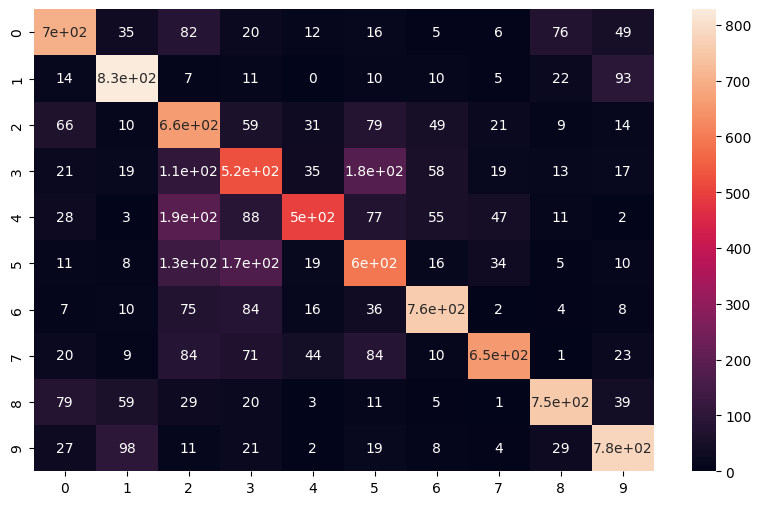

In [39]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

# Predicting a given image

In [40]:
my_image = x_test[16]

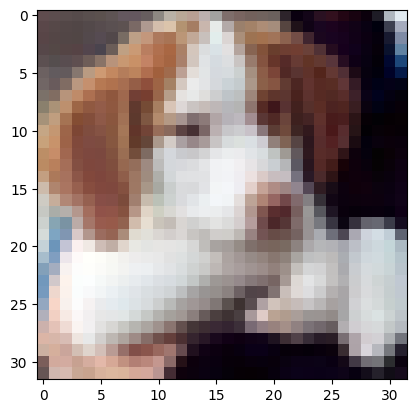

In [41]:
plt.imshow(my_image)

In [42]:
sample = model.predict(my_image.reshape(1,32,32,3))
sample.argmax(axis = -1)

1/1 [==============================] - 0s 39ms/step


array([5])

In [43]:
# https://www.cs.toronto.edu/~kriz/cifar.html
def label_name(index):
    lst =  ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse','ship','truck']
    return lst[index]


In [45]:
sample_class = sample.argmax(axis = -1)
label_name(sample_class[0])

'dog'